In [70]:
#importing library packages
import pandas as pd # data analysis library
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # predictive modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear Regression 
import sklearn.linear_model # linear models

#specifying the file name
file = "./birthweight.xlsx"

#reading the file into Python
birthweight = pd.read_excel(io = file)

#displaying the first ten rows of the data
birthweight.head(n=10)


,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,69,NaN,5,2.0,62,NaN,4,7,23,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68,12.0,3,10.0,61,11.0,4,6,25,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71,12.0,3,6.0,46,12.0,2,7,21,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59,16.0,1,8.0,48,16.0,7,8,21,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48,12.0,4,6.0,39,12.0,2,9,17,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,67,11.0,4,8.0,40,8.0,4,9,16,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,54,12.0,2,12.0,46,12.0,9,9,17,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,71,14.0,4,7.0,51,11.0,9,8,15,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,56,12.0,1,9.0,53,14.0,8,9,14,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,58,12.0,2,12.0,61,16.0,9,9,13,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
#removing unnamed columns between index 18 to 34
birthweight.drop(birthweight.iloc[:, 18:34], 
                 inplace = True, axis = 1)

#displaying the first ten rows of the data after removal of unnamed columns
birthweight.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [72]:
# descriptive statistics
birthweight.describe().round(0)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.0,193.0,196.0,193.0,196.0,189.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0
mean,40.0,14.0,2.0,12.0,39.0,14.0,8.0,9.0,11.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3334.0
std,10.0,2.0,1.0,4.0,9.0,3.0,2.0,1.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,647.0
min,23.0,8.0,1.0,2.0,23.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,697.0
25%,33.0,12.0,2.0,10.0,35.0,12.0,8.0,9.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2916.0
50%,39.0,14.0,2.0,12.0,38.0,14.0,9.0,9.0,11.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3452.0
75%,46.0,16.0,3.0,12.0,43.0,16.0,9.0,9.0,15.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3760.0
max,71.0,17.0,8.0,35.0,73.0,17.0,10.0,10.0,25.0,14.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4933.0


In [73]:
#checking information about the dataset variables
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [74]:
#checking for the total number of missing values per column
print(birthweight.isnull().sum(axis = 0))

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64


In [75]:
# developing a loop to automatically flag missing values
for col in birthweight:

    if birthweight[col].isnull().astype(int).sum() > 0:
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)

In [76]:
# looping to display column names
for column in birthweight:
    print(column)

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght
m_meduc
m_npvis
m_feduc


In [77]:
# creating a column to sum missing value flags
birthweight['mv_sum'] = birthweight['m_meduc'] + \
                     birthweight['m_feduc'] + \
                     birthweight['m_npvis']


# displaying the results
print(f"""

Number of Missing Values per Observation
----------------------------------------------
{(birthweight['mv_sum'].value_counts(normalize = True,
                                sort = True,
                                ascending = True)*100).round(2)}
""")



Number of Missing Values per Observation
----------------------------------------------
2     1.53
1     3.57
0    94.90
Name: mv_sum, dtype: float64



In [78]:
# the new DataFrame is made independent
df_dropped = pd.DataFrame.copy(birthweight)


# using dropna() for df_dropped
df_dropped = df_dropped.dropna().round(2)


# checking to see if all missing values have been dropped
print(df_dropped.isnull().sum())

mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
m_meduc    0
m_npvis    0
m_feduc    0
mv_sum     0
dtype: int64


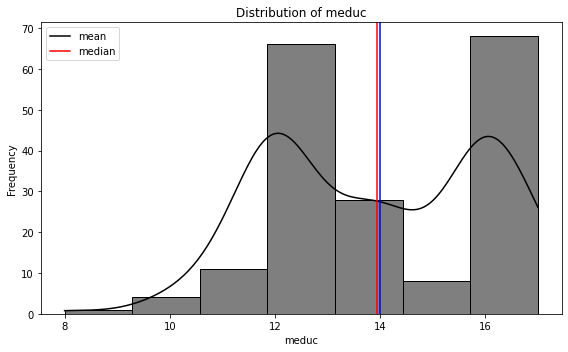

In [79]:
# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for meduc
sns.histplot(data  = df_dropped,
             x     = 'meduc',
             bins  = 'fd',
             kde   = True, 
             color = 'black')



# titles and labels
plt.title(label = "Distribution of meduc")
plt.xlabel(xlabel = 'meduc')
plt.ylabel(ylabel = 'Frequency')


# New: These add vertical lines to the code
plt.axvline(x = df_dropped['meduc'].mean(),
            color = 'red')


plt.axvline(x = df_dropped['meduc'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

In [80]:
#The mother's education displayed above is negatively skewed the mean will be used to fill the missing values                  
# filling meduc missing values with mean
meduc_mean = birthweight['meduc'].mean()


# filling meduc NAs with mean
birthweight['meduc'].fillna(value = meduc_mean,
                         inplace = True)


# checking to make sure NAs are filled in
print(birthweight['meduc'].isnull().any())

False


In [81]:
# subsetting original missing values for meduc
birthweight.loc[ : , ['m_meduc', 'meduc']][  birthweight.loc[ : , 'm_meduc'] == 1  ]

,m_meduc,meduc
0,1,13.911917
111,1,13.911917
114,1,13.911917


In [82]:
# filling npvis missing values with mean
npvis_mean = birthweight['npvis'].mean()


# filling npvis NAs with mean
birthweight['npvis'].fillna(value = npvis_mean,
                         inplace = True)


# checking to make sure NAs are filled in
print(birthweight['npvis'].isnull().any())

False


In [83]:
# subsetting original missing values for npvis
birthweight.loc[ : , ['m_npvis', 'npvis']][  birthweight.loc[ : , 'm_npvis'] == 1  ]

,m_npvis,npvis
73,1,11.601036
111,1,11.601036
185,1,11.601036


In [84]:
# filling feduc  missing values with mean
feduc_mean = birthweight['feduc'].mean()


# filling feduc  NAs with mean
birthweight['feduc'].fillna(value = feduc_mean,
                         inplace = True)


# checking to make sure NAs are filled in
print(birthweight['feduc'].isnull().any())

False


In [85]:
# subsetting original missing values for feduc
birthweight.loc[ : , ['m_feduc', 'feduc']][  birthweight.loc[ : , 'm_feduc'] == 1  ]

,m_feduc,feduc
0,1,13.846561
74,1,13.846561
99,1,13.846561
114,1,13.846561
153,1,13.846561
164,1,13.846561
191,1,13.846561


In [86]:
# saving the imputed dataset to Excel
birthweight.to_excel(excel_writer = "./birthweight_imputed.xlsx",
                  sheet_name = 'birthweight_imputed',
                  index = False)

In [87]:
#checking to see if the missing values are filled.
birthweight.isnull().sum(axis=0)

mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
m_meduc    0
m_npvis    0
m_feduc    0
mv_sum     0
dtype: int64

In [88]:
continuous_data = ["bwght", "cigs", "drink", "omaps","fmaps","monpre","npvis","male",
                   "mwhte", "mblck","moth","fwhte","fblck","foth","m_npvis","mv_sum"]


# developing a correlation matrix based on continuous features
birthweight_corr = birthweight[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with birthweight
birthweight_corr.loc[ : ,"bwght"  ].round(decimals = 2).sort_values(ascending = False,)

bwght      1.00
omaps      0.25
fmaps      0.25
mblck      0.13
fblck      0.12
male       0.11
npvis      0.06
m_npvis    0.06
moth      -0.02
mv_sum    -0.03
fwhte     -0.04
monpre    -0.05
foth      -0.08
mwhte     -0.11
cigs      -0.57
drink     -0.74
Name: bwght, dtype: float64

In [89]:
#preparing the x-varibles for the statsmodel
for column in birthweight:
    print(column, end="+")

mage+meduc+monpre+npvis+fage+feduc+omaps+fmaps+cigs+drink+male+mwhte+mblck+moth+fwhte+fblck+foth+bwght+m_meduc+m_npvis+m_feduc+mv_sum+

In [90]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage+cigs+drink""", 
                                    data = birthweight)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     152.7
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.31e-50
Time:                        21:53:09   Log-Likelihood:                -1426.6
No. Observations:                 196   AIC:                             2861.
Df Residuals:                     192   BIC:                             2874.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4928.7856    106.672     46.205      0.0

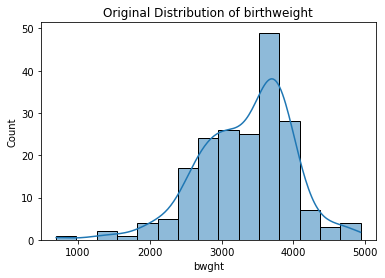

In [91]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of birthweight")
plt.xlabel(xlabel = "bwght") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [92]:
# log transforming bwght and saving it to the dataset
birthweight['log_bwght'] = np.log(birthweight['bwght'])

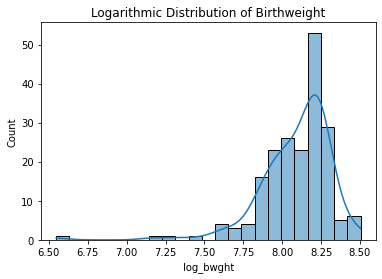

In [93]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Birthweight")
plt.xlabel(xlabel = "log_bwght")
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [94]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """log_bwght ~ mage+cigs+drink""", 
                                    data = birthweight)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     121.2
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           4.43e-44
Time:                        21:53:09   Log-Likelihood:                 112.68
No. Observations:                 196   AIC:                            -217.4
Df Residuals:                     192   BIC:                            -204.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6803      0.041    209.480      0.0

In [95]:
#
birthweight_data = birthweight.drop(["bwght","fmaps","omaps"], axis =1)

#response variables
birthweight_target = birthweight.loc[:, "bwght"]


#training and testing data
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 20)
y-side: (147,)


Testing Data
------------
X-side: (49, 20)
y-side: (49,)



In [96]:
#merging x_train and y_train for the statsmodel
birthweight_train = pd.concat([x_train, y_train], axis = 1)

#statsmodel
lm_best = smf.ols(formula = """bwght ~ mage+
cigs+drink""",
                 data = birthweight_train)

#fitting the model to the data
results = lm_best.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     118.1
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.59e-38
Time:                        21:53:09   Log-Likelihood:                -1073.0
No. Observations:                 147   AIC:                             2154.
Df Residuals:                     143   BIC:                             2166.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5077.0249    124.196     40.879      0.0

In [97]:
#creating a list for x-variables to use in the model
#x_variables = ["mage","meduc","monpre","npvis","fage","feduc","cigs","drink","male","mwhte","mblck","fwhte","fblck","m_meduc","m_npvis","m_feduc","mv_sum"]


x_variables = ["mage","cigs","drink"]

In [98]:
#applying the ols model in scikit-learn

#preparing x-variables from the ols model
ols_data = birthweight.loc[:, x_variables]

#response variable
birthweight_target = birthweight.loc[:, "bwght"]

#train-test spilt 
# FULL X-dataset 
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset 
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         
            birthweight_target,   
            test_size = 0.25,
            random_state = 219)


In [99]:
#Instantiating LinearRegression
lr = LinearRegression()

#fitting training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)

#predicting new data
lr_pred = lr_fit.predict(x_test_OLS)

#scoring the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) 

lr_train_score=lr.score(x_test_OLS, y_test_OLS).round(4)
lr_test_score=lr.score(x_train_OLS, y_train_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7125
OLS Testing Score  : 0.6444
OLS Train-Test Gap : 0.0681


In [100]:
# instantiate a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0,  
                                         normalize = True) 


# fit to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# predict on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # 
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.9594
Lasso Testing Score  : 0.9542
Lasso Train-Test Gap : 0.0052


In [101]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.9622
Testing Score : 0.9547
ARD Train-Test Gap : 0.0075


In [102]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}          {lr_test_score}
Lasso      {lasso_train_score}          {lasso_test_score}
ARD        {ard_train_score}          {ard_test_score}

Lasso is my Final Model as it has a train_test Gap of 0.005""")





Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.6444          0.7125
Lasso      0.9594          0.9542
ARD        0.9622          0.9547

Lasso is my Final Model as it has a train_test Gap of 0.005
